In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
# from z_visualization import plot_evolution_3d


In [189]:
def gain_surface_func(x, y):
    return x - y

def population_progress_avg(df):
    X = []
    Y = []
    for gen in range(df['gen'].max()+1):
        player_life_avg = df[df.gen == gen]['player_life'].mean()
        enemy_life_avg = df[df.gen == gen]['enemy_life'].mean()
        X.append(player_life_avg)
        Y.append(enemy_life_avg)
    return np.array(X), np.array(Y)
    
def population_progress_best(df):
    X = []
    Y = []
    for gen in range(df['gen'].max()+1):
        best = df[df.gen == gen].sort_values('gain', ascending=False).iloc[0]
        player_life_best = best.player_life
        enemy_life_best = best.enemy_life
        X.append(player_life_best)
        Y.append(enemy_life_best)
    return np.array(X), np.array(Y)

def plot_evolution_3d(df, ax, name='', surface_func = gain_surface_func):
    ax.set_xlabel('player_life')
    ax.set_ylabel('enemy_life')
    ax.set_zlabel('gain')

    ax.view_init(elev=30, azim=225)
    ax.set_xlim3d(0, 100)
    ax.set_ylim3d(0, 100)
    ax.set_zlim3d(-100, 100)

    x = y = np.arange(0, 100.0, 1)
    X, Y = np.meshgrid(x, y)
    zs = np.array(gain_surface_func(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)
    k = 0.1
    colors = cm.RdYlGn( (k*X + (1-k)*(100-Y))/100 )
    ax.plot_surface(X, Y, Z,facecolors=colors, alpha=0.5)

    X, Y = population_progress_avg(df)
    zs = np.array(gain_surface_func(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)
    ax.plot(X,Y,Z, 'ro-', linewidth=3)

    X, Y = population_progress_best(df)
    zs = np.array(gain_surface_func(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)
    ax.plot(X,Y,Z, 'bo-', linewidth=3)

    plt.title(name)

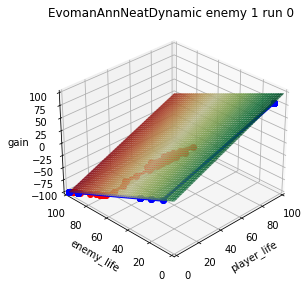

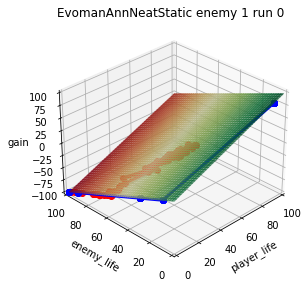

In [192]:
results_dir = './results/Specialist_final_1'

methods = ['EvomanAnnNeatDynamic', 'EvomanAnnNeatStatic']

enemies = [1]
n_runs = 1

for method in methods:
    for enemy in enemies:
        fig = plt.figure(figsize=(30,10))
        rows,cols = (2,5)
        for run in range(n_runs):
            filename = '{}/{}_run_{}/enemy{}/results_training.csv'.format(results_dir, method, run,enemy)
            df = pd.read_csv(filename, delimiter=';')
            name = '{} enemy {} run {}'.format(method, enemy, run)
            ax = plt.subplot(rows, cols, run+1, projection='3d')     
            plot_evolution_3d(df, ax, name)
        plt.show()
